In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train_titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

# Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

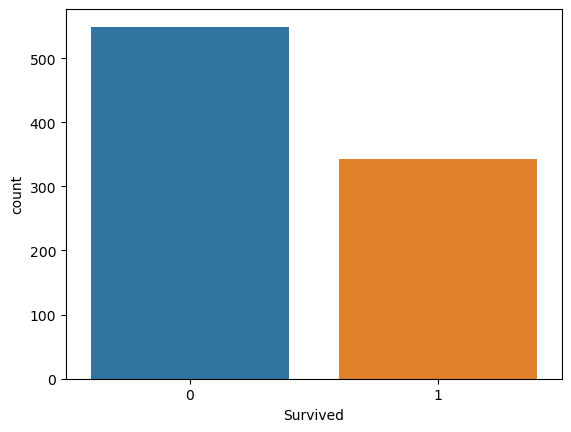

In [4]:
import seaborn as sns
sns.countplot(x='Survived',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

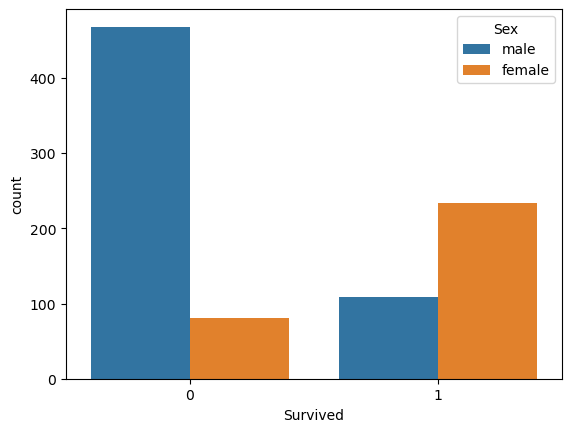

In [5]:
sns.countplot(x='Survived',hue= 'Sex',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

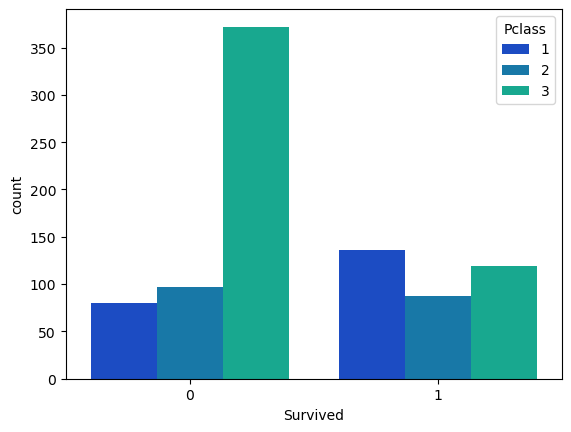

In [6]:
sns.countplot(x='Survived',hue= 'Pclass',data=data, palette= 'winter')

In [7]:
#females survived more than males
# first class passengers are more likely to survived

<AxesSubplot:ylabel='Frequency'>

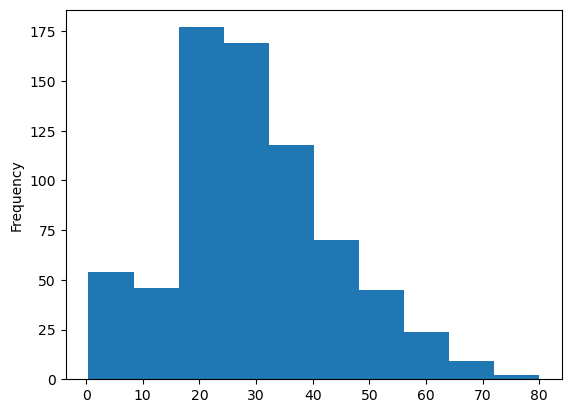

In [8]:
data['Age'].plot.hist()

In [9]:
# We notice that young age between 20-40 more than age group 70-80

<AxesSubplot:ylabel='Frequency'>

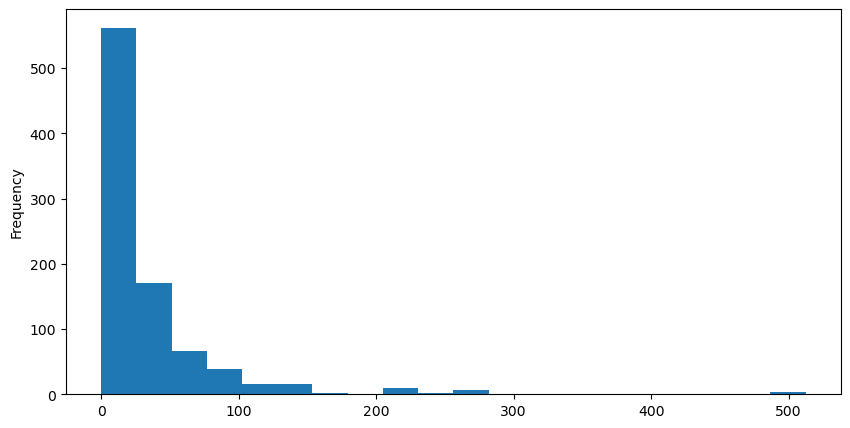

In [10]:
data['Fare'].plot.hist(bins=20,figsize=(10,5))

# data cleaning

In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data.drop('Cabin',axis=1,inplace=True)

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# OneHotEncoding

In [15]:
pd.get_dummies(data['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [16]:
Sex = pd.get_dummies(data['Sex'],drop_first=True)
Sex.head()
                     

,male
0,1
1,0
2,0
3,0
4,1


In [17]:
# we have dropped many columns ,one column is sufficient to determine the gender either male(1) or not(0), that means a female

In [18]:
embark = pd.get_dummies(data['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [19]:
embark = pd.get_dummies(data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
Pcl = pd.get_dummies(data['Pclass'],drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [21]:
titanic = pd.concat([data,Sex,embark,Pcl], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [22]:
titanic.drop(['Name','PassengerId','Pclass','Ticket', 'Sex','Embarked'],axis=1,inplace=True)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Model Building

# Train data

In [23]:
X = titanic.drop('Survived', axis=1)
y= titanic['Survived']

In [24]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [25]:
X.shape

(712, 9)

In [26]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.33,random_state=3)

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [41]:
X_train.shape

(477, 9)

In [42]:
y_train.shape

(477,)

In [43]:
X.columns 

Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', '2', '3'], dtype='object')

In [44]:
X.columns = X.columns.astype(str)

In [45]:
lr.fit(X_train,y_train)

C:\Users\Acer\anaconda37\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
prediction= lr.predict(X_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.80      0.89      0.84       143\n           1       0.79      0.65      0.71        92\n\n    accuracy                           0.80       235\n   macro avg       0.79      0.77      0.78       235\nweighted avg       0.80      0.80      0.79       235\n'

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
 confusion_matrix(y_test, prediction)

array([[127,  16],
       [ 32,  60]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,prediction)

0.7957446808510639

# our model will accurately predict 80% survival rate 

# using decision tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [54]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred)

0.7404255319148936

In [57]:
titanic

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [58]:
passengerID = data['PassengerId'].values

In [59]:
passengerID.shape

(712,)

In [67]:
y_final = titanic['Survived']

In [68]:
y_final.shape

(712,)

In [69]:
submission = pd.DataFrame()

In [70]:
submission['passengerID'] = passengerID
submission['Survived'] = y_final

In [71]:
submission

,passengerID,Survived
0,1,0.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,0.0
...,...,...
707,886,1.0
708,887,1.0
709,888,NaN
710,890,1.0


# Thank You!